## 6.4 卷积神经网络的相关参数

### 6.4.1 卷积函数tf.nn.conv2d

In [2]:
# TensorFlow中使用tf.nn.conv2d函数来实现卷积
# tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)
# input—需要做卷积的输入图像，要求是一个Tensor，具有[batch, in_height, in_width, in_channels]这样的形状
# filter—卷积核，要求是一个Tensor，具有[filter_height, filter_width, in_channels, out_channels]这样的形状
# stride—卷积时在图像每一维的步长,[ 1, strides, strides, 1]，第一位和最后一位固定必须是1
# padding—string类型的量，只能是SAME(-填充到卷积核可以到达图像边缘)和VALID-(边缘不填充)
# use_cudnn_on_gpu—bool类型，是否使用cudnn加速，默认为True
# 注意: 在设为SAME的情况下，只有在步长为1时生成的feature map才会与输入值相等


### 6.4.3 卷积函数的使用

In [15]:
# 通过手动生成一个5X5的矩阵来模拟图片，
# 定义一个2X2的卷积核，来测试tf.nn.conv2d函数中的不同参数
import tensorflow as tf
import pylab

# 定义输入变量
# [batch_size, in_height, in_with, in_channels]
input1 = tf.Variable(tf.constant(1.0, shape=[1, 5, 5, 1]))
input2 = tf.Variable(tf.constant(1.0, shape=[1, 5, 5, 2]))
input3 = tf.Variable(tf.constant(1.0, shape=[1, 4, 4, 1]))

# 定义卷积核变量
# [filter_height, filter_width, in_channels, out_channels]
filter1 = tf.Variable(tf.constant([-1., 0, 0, -1], shape=[2, 2, 1, 1]))
filter2 = tf.Variable(tf.constant([-1., 0, 0,  -1, 
                                   -1., 0, 0,  -1], 
                                  shape=[2, 2, 1, 2]))
filter3 = tf.Variable(tf.constant([-1., 0, 0,  -1, 
                                   -1., 0, 0,  -1,
                                   -1., 0, 0,  -1], 
                                  shape=[2, 2, 1, 3]))
filter4 = tf.Variable(tf.constant([-1., 0, 0,  -1, 
                                   -1., 0, 0,  -1,
                                   -1., 0, 0,  -1,
                                   -1., 0, 0,  -1], 
                                  shape=[2, 2, 2, 2]))
filter5 = tf.Variable(tf.constant([-1., 0, 0,  -1, 
                                   -1., 0, 0,  -1], 
                                  shape=[2, 2, 2, 1]))

# 定义卷积操作
# padding的值为VALID表示边缘不填充，当其为SAME时，表示填充到卷积核可以到达图像边缘

# 1个通道输入，生产1个feature map
op1 = tf.nn.conv2d(input1, filter1, strides=[1, 2, 2, 1], padding='SAME')

# 1个通道输入，生产2个feature map
op2 = tf.nn.conv2d(input1, filter2, strides=[1, 2, 2, 1], padding='SAME')

# 1个通道输入，生产3个feature map
op3 = tf.nn.conv2d(input1, filter3, strides=[1, 2, 2, 1], padding='SAME')

# 2个通道输入，生产2个feature map
op4 = tf.nn.conv2d(input2, filter4, strides=[1, 2, 2, 1], padding='SAME')

# 2个通道输入，生产1个feature map
op5 = tf.nn.conv2d(input2, filter5, strides=[1, 2, 2, 1], padding='SAME')

# 5X5 对于padding的不同而不同
vop1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='VALID')
op6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='SAME')

# 4X4与padding无关
vop6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='VALID')

# 运行卷积操作
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    print('op1\n', sess.run([op1, filter1]))
    print('-'*50)
    print('op2\n', sess.run([op2, filter2]))
    print('op3\n', sess.run([op3, filter3]))
    print('-'*50)
    print('op4\n', sess.run([op4, filter4]))
    print('op5\n', sess.run([op5, filter5]))
    print('-'*50)
    print('op1\n', sess.run([op1, filter1]))
    print('vop1\n', sess.run([vop1, filter1]))
    print('op6\n', sess.run([op6, filter1]))
    print('vop6\n', sess.run([vop6, filter1]))

op1
 [array([[[[-2.],
         [-2.],
         [-1.]],

        [[-2.],
         [-2.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.]]]], dtype=float32), array([[[[-1.]],

        [[ 0.]]],


       [[[ 0.]],

        [[-1.]]]], dtype=float32)]
--------------------------------------------------
op2
 [array([[[[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-1., -1.],
         [-1., -1.],
         [-1.,  0.]]]], dtype=float32), array([[[[-1.,  0.]],

        [[ 0., -1.]]],


       [[[-1.,  0.]],

        [[ 0., -1.]]]], dtype=float32)]
op3
 [array([[[[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -1.,  0.],
         [-2., -1.,  0.],
         [-1.,  0.,  0.]]]], dtype=float32), array([[[[-1.,  0.,  0.]],

        [[-1., -1.,  0.]]],


       [[[ 0., -1., -1.]],

       

### 8.4.4 使用卷积提取图片轮廓

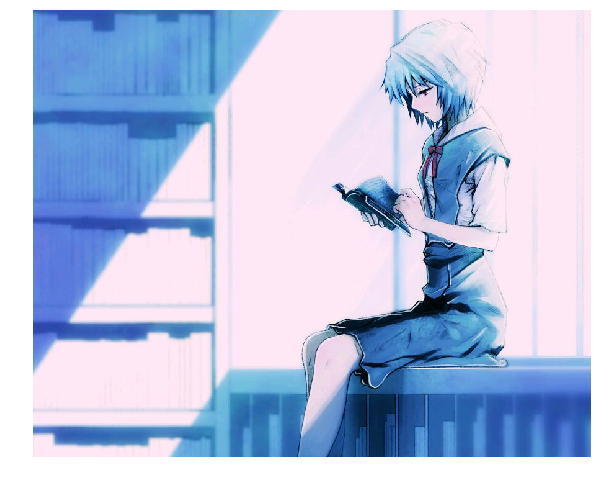

(720, 900, 3)


In [19]:
# 使用sobel算子，将彩色的图片生成带有边缘化信息的图片
import matplotlib.pyplot as plt # plt用于显示图片
import matplotlib.image as mpimg # mpimg用于读取图片
import numpy as np
import tensorflow as tf

# 载入图片并显示
myimg = mpimg.imread('img.jpg') # 读取和代码处于同一目录下的图片
plt.figure(figsize=(10,10))
plt.imshow(myimg) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
print(myimg.shape)

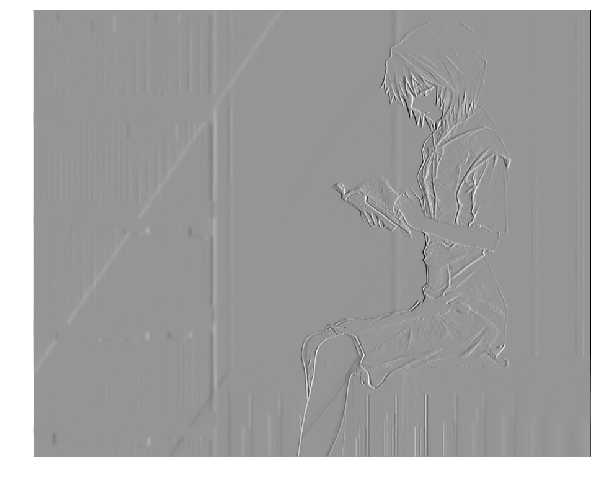

In [24]:
# 定义占位符，卷积核，卷积op

# sobel算子处理过的图片不能保证每个像素都在0-255之间，所以要做一次归一化操作
# 让生成的值都在[0,1]之间，然后再乘以255

# 输入必须具有[batch_size, in_height, in_width, in_channels]这样的形状
full = np.reshape(myimg, [1, 720, 900, 3]) 
inputfull = tf.Variable(tf.constant(1.0, shape = full.shape))

filter = tf.Variable(tf.constant([[-1.0, -1.0, -1.0],
                                  [0, 0, 0],
                                  [1.0, 1.0, 1.0],
                                  [-2.0, -2.0, -2.0],
                                  [0, 0, 0],
                                  [2.0, 2.0, 2.0],
                                  [-1.0, -1.0, -1.0],
                                  [0, 0, 0],
                                  [1.0, 1.0, 1.0]], shape=[3, 3, 3, 1]))
# 3个通道输入，生成一个feature_map
op = tf.nn.conv2d(inputfull, filter, strides=[1,1,1,1], padding='SAME')
o = tf.cast(((op-tf.reduce_min(op))/(tf.reduce_max(op)-tf.reduce_min(op)))*255, 
            tf.uint8)

# 运行卷积操作并显示
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    t, f = sess.run([o, filter], feed_dict={inputfull: full})
    t = np.reshape(t, [720, 900])
    
    plt.figure(figsize=(10, 10))
    plt.imshow(t, cmap='Greys_r')
    plt.axis('off')
    plt.show()

### 6.4.5 池化函数tf.nn.max_pool(avg_pool)

In [26]:
# TensorFlow 中的池化函数如下
# tf.nn.max_pool(input, ksize, strides, padding, name=None)
# tf.nn.avg_pool(input, ksize, strides, padding, name=None)
# 池化参数与卷积参数类似
# value—需要池化的输入，一般池化层接在卷积层之后，所以通常是feature_map, 
# 输入的value具有[batch_size, height, width, channels]这样的shape
# ksize—池化窗口的大小，取一个四维向量，一般是[1, height, width, 1], 因为一般不会对batch和channels进行卷积
# strides—窗口在每一维上滑动的步长， 一般也是[1, stride, stride, 1]
# padding—与卷积参数含义相同，只能取SAME和VALID，SAME是padding操作，VALID是不进行padding
# 返回一个Tensor，类型不变，shape依然是[batch, height, width, channels]的形式 

### 6.4.6 池化函数的使用

In [29]:
# 生成一个4X4的矩阵来模拟图片，定义一个2X2的滤波器，
# 通过几个在卷积神经网络中常用的池化操作来测试池化函数中的参数，并验证输出结果

# 定义输出变量
import tensorflow as tf 
import pylab
img = tf.constant([
    [[0.0, 4.0],[0.0, 4.0],[0.0, 4.0],[0.0, 4.0]],
    [[1.0, 5.0],[1.0, 5.0],[1.0, 5.0],[1.0, 5.0]],
    [[2.0, 6.0],[2.0, 6.0],[2.0, 6.0],[2.0, 6.0]],
    [[3.0, 7.0],[3.0, 7.0],[3.0, 7.0],[3.0, 7.0]]
    ])
img = tf.reshape(img, [1, 4, 4, 2])

# 定义池化操作
pooling = tf.nn.max_pool(img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
pooling1 = tf.nn.max_pool(img, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
pooling2 = tf.nn.avg_pool(img, ksize=[1,4,4,1], strides=[1,1,1,1], padding='SAME')
pooling3 = tf.nn.avg_pool(img, ksize=[1,4,4,1], strides=[1,4,4,1], padding='SAME')
nt_hpool2_flat = tf.reshape(tf.transpose(img), [-1, 16])
pooling4 = tf.reduce_mean(nt_hpool2_flat, 1) # 表示对行求均值

# 运行池化操作
with tf.Session() as sess:
    print('image:\n', sess.run(img))
    print('result:\n', sess.run(pooling))
    print('result1:\n', sess.run(pooling1))
    print('result2:\n', sess.run(pooling2))
    print('result3:\n', sess.run(pooling3))
    print('result4:\n', sess.run(pooling4))

image:
 [[[[0. 4.]
   [0. 4.]
   [0. 4.]
   [0. 4.]]

  [[1. 5.]
   [1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]
   [3. 7.]]]]
result:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]]
result1:
 [[[[1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]]]]
result2:
 [[[[1.  5. ]
   [1.  5. ]
   [1.  5. ]
   [1.  5. ]]

  [[1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]]

  [[2.  6. ]
   [2.  6. ]
   [2.  6. ]
   [2.  6. ]]

  [[2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]]]]
result3:
 [[[[1.5 5.5]]]]
result4:
 [1.5 5.5]


## 8.5 使用卷积神经网络对图片分类

## 8.6 反卷积神经网络


In [30]:
# 反卷积是指，通过测量输出和已知输入重构位置输入的过程
# 在神经网络中，反卷积并不具备学习的能力，
# 仅仅是用于可视化一个已经训练好的额卷积神经网络，没有学习训练的过程